In [ ]:
from utils import plot_imgs
import cv2
import numpy as np
from jointrecog.datasets.kaggle_rhd import KaggleRhd

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [36]:
config = {
    'validation_size': 5000,
    'scoremap_variance': 7,
    'disk_radius': 5,
}
dataset = KaggleRhd(**config)
test_data = dataset.get_test_set()
train_data = dataset.get_training_set()

In [23]:
# TODO: properly draw the lines of the joints
def draw_keypoints(d, color=(0, 255, 0)):
    keypoints = [cv2.KeyPoint(c[1], c[0], 1) for c in d['keypoints']]
    return cv2.drawKeypoints(d['image'].astype(np.uint8), keypoints, None, color=color)

# Cropped and resized images with score maps

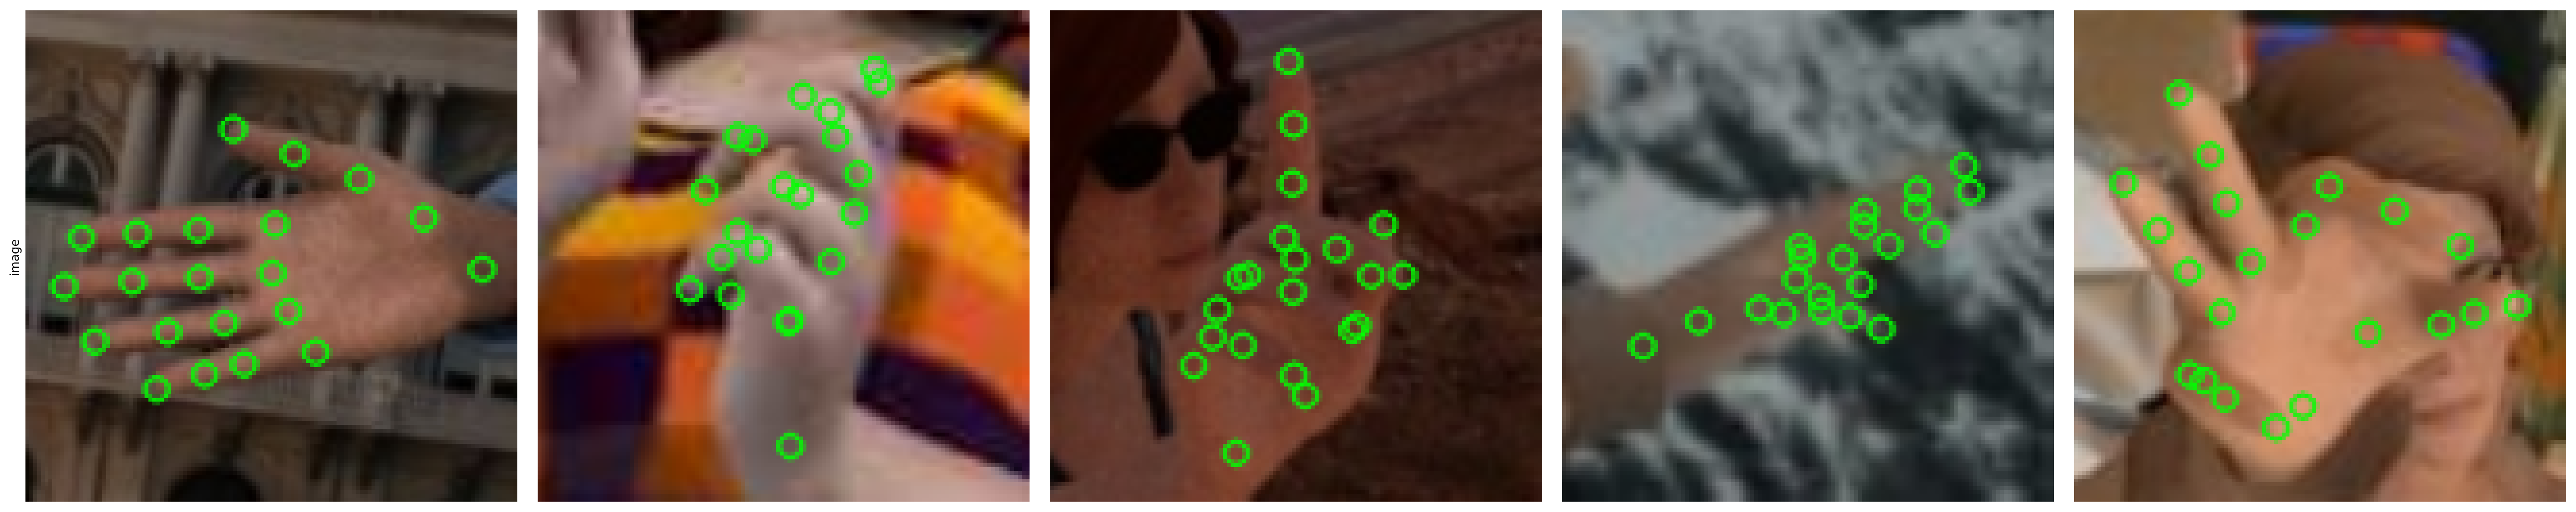

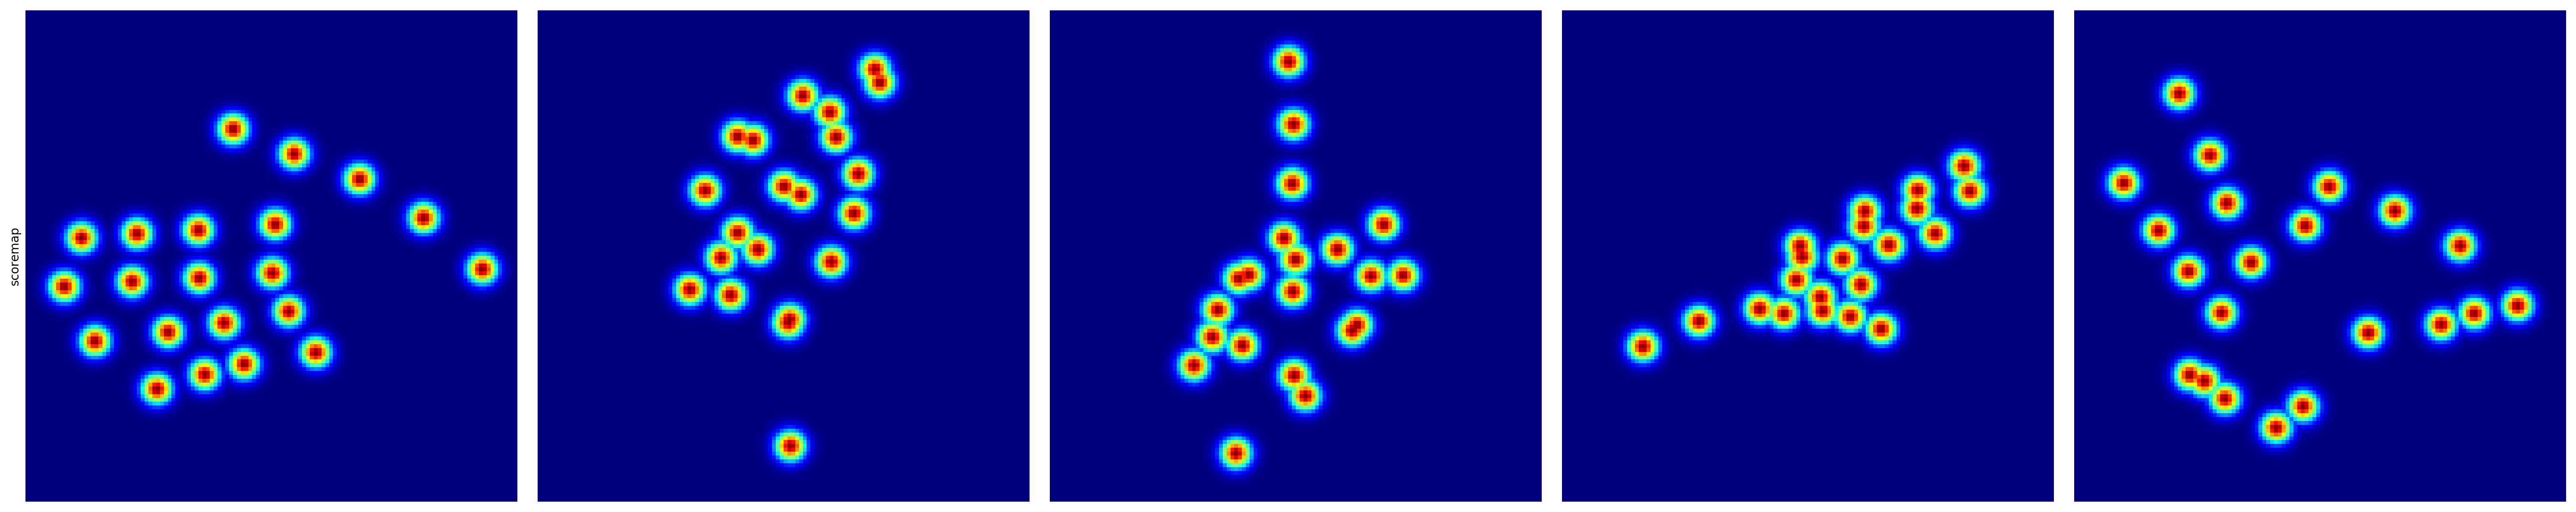

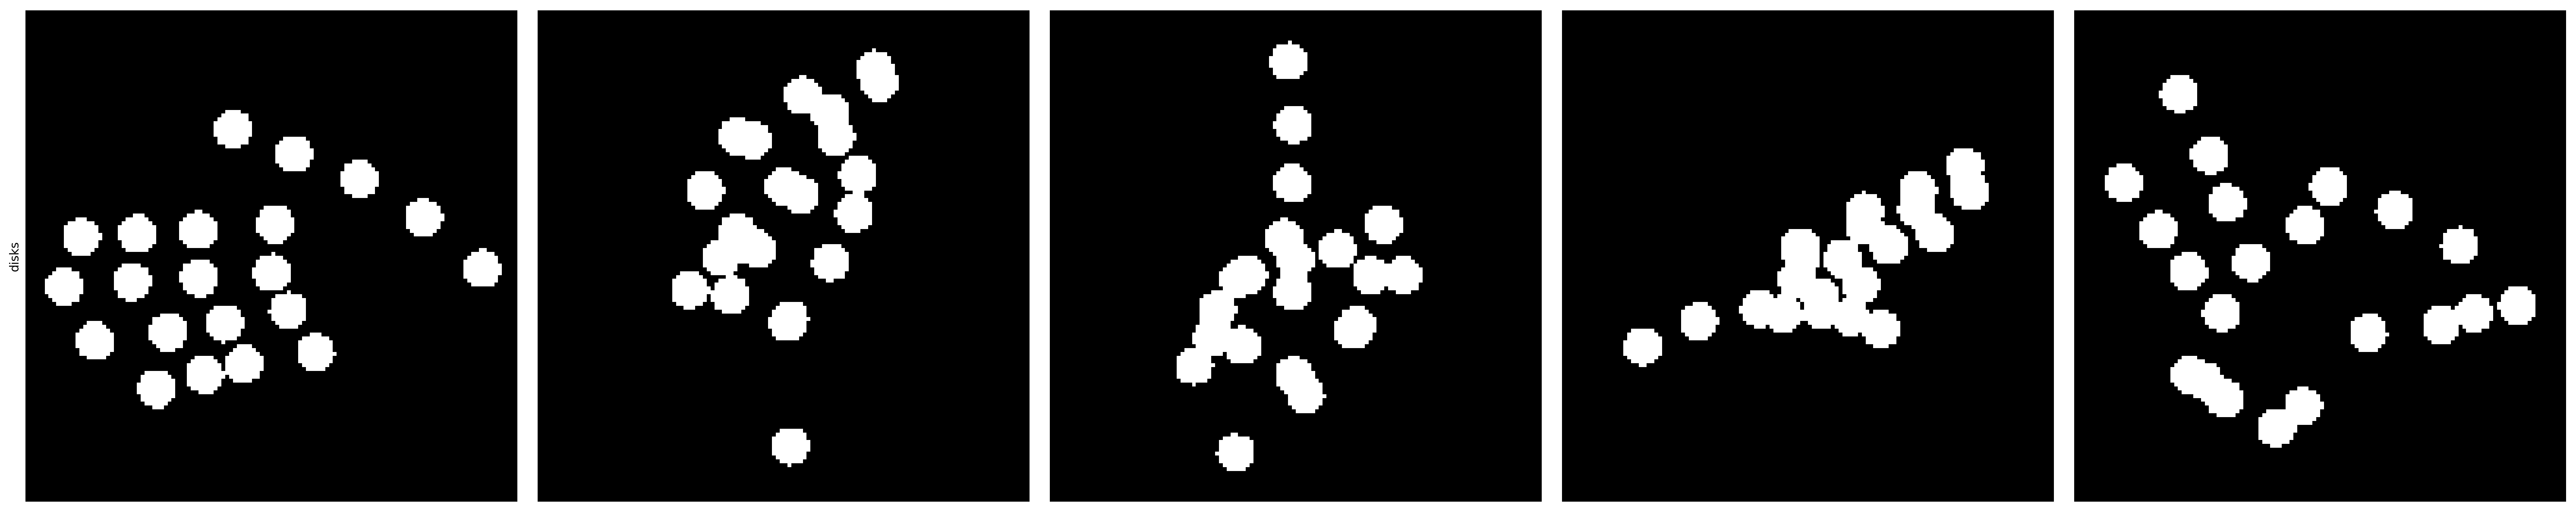

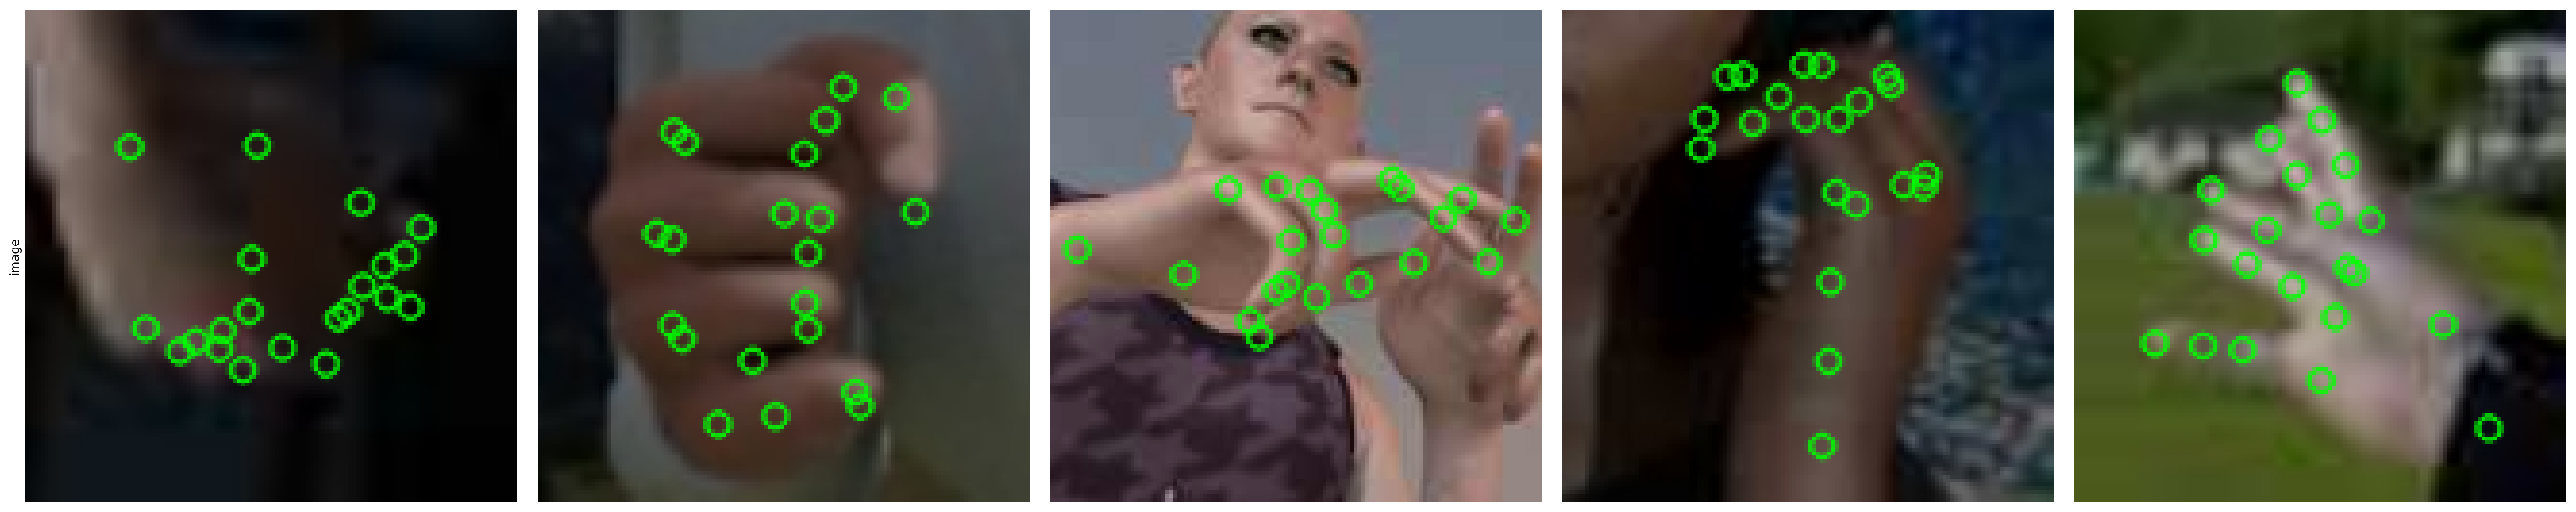

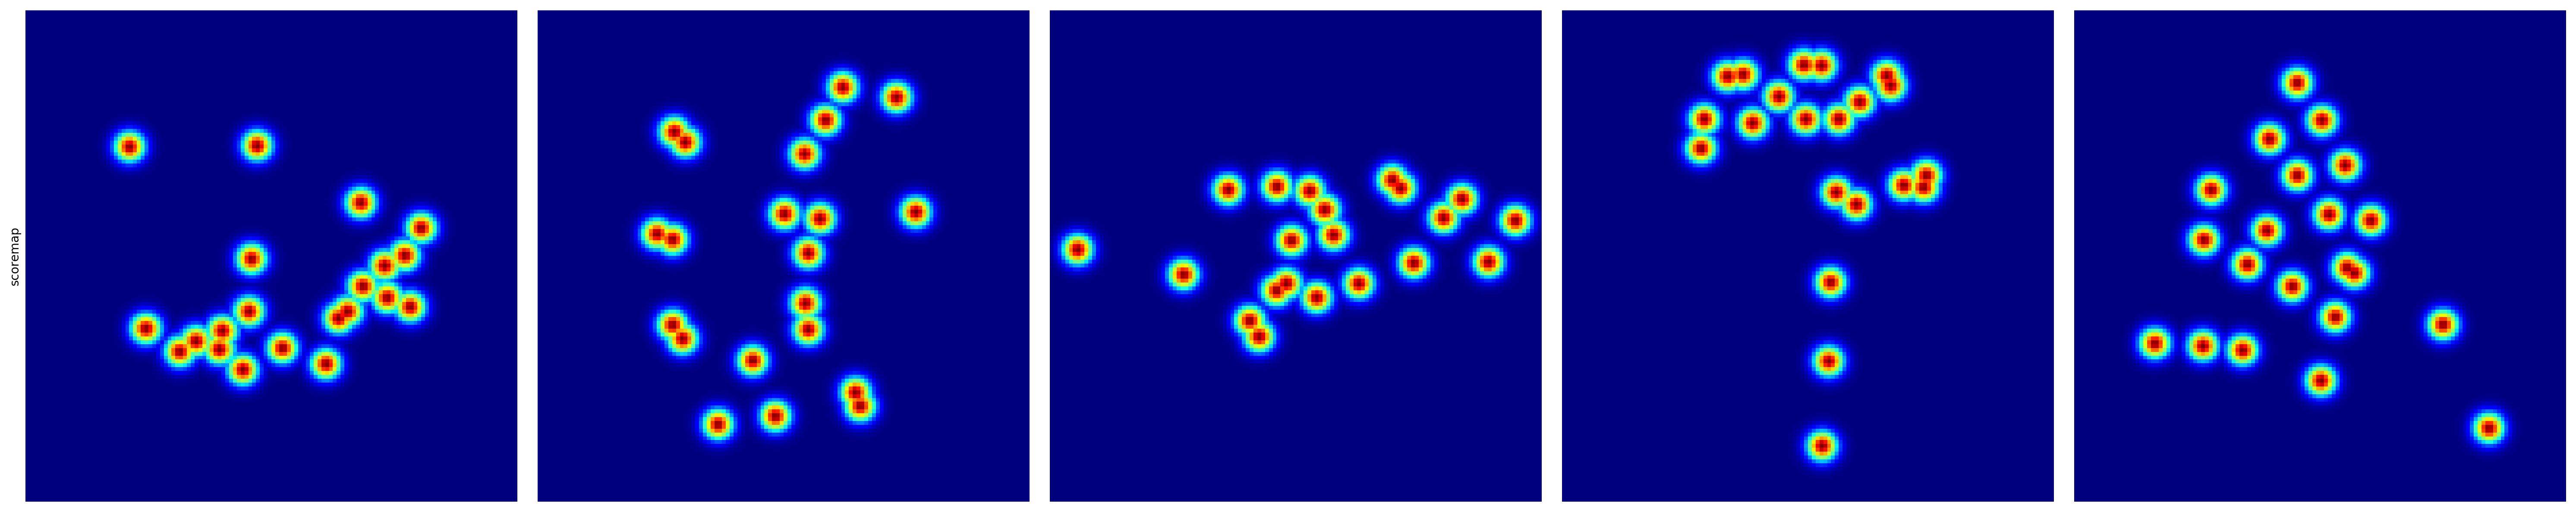

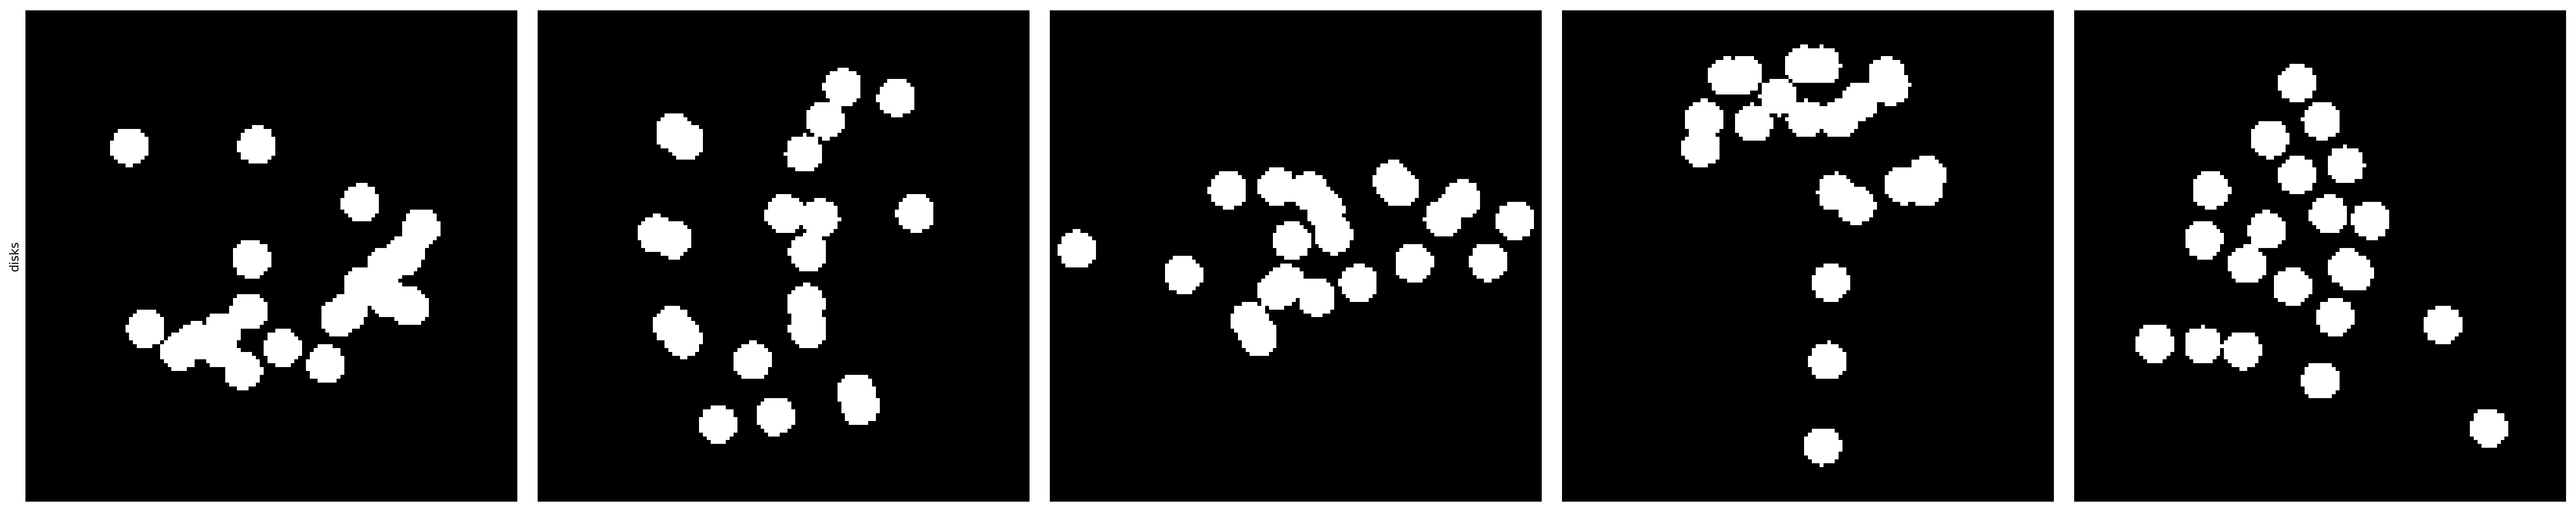

In [37]:
for i in range(2):
    data = [next(train_data) for _ in range(5)]
    plot_imgs([draw_keypoints(d)/255. for d in data], dpi=200, ylabel='image')
    plot_imgs([np.max(d['scoremap'], axis=-1) for d in data], dpi=200, cmap='jet', ylabel='scoremap')
    plot_imgs([np.max(d['disks'], axis=-1) for d in data], dpi=200, cmap='gray', ylabel='disks')

# Original training images

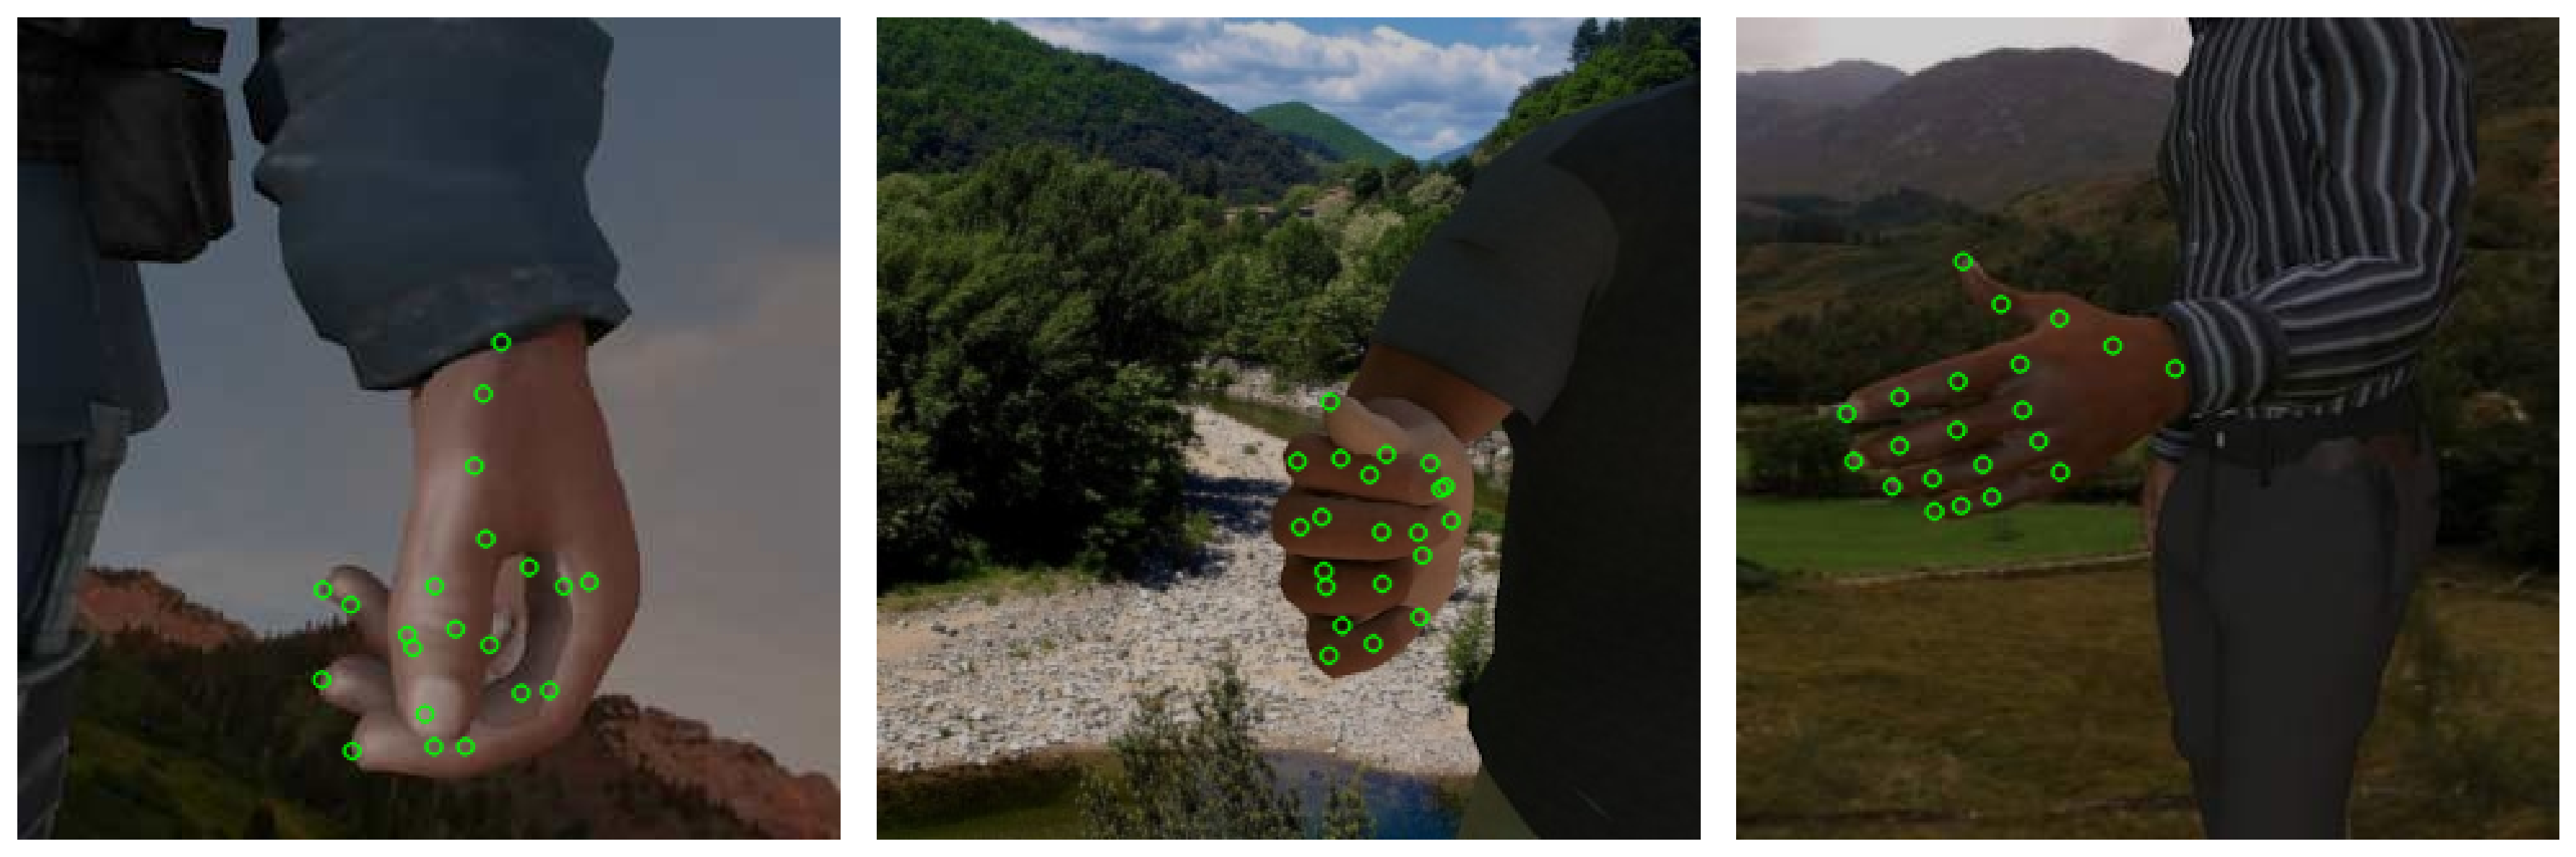

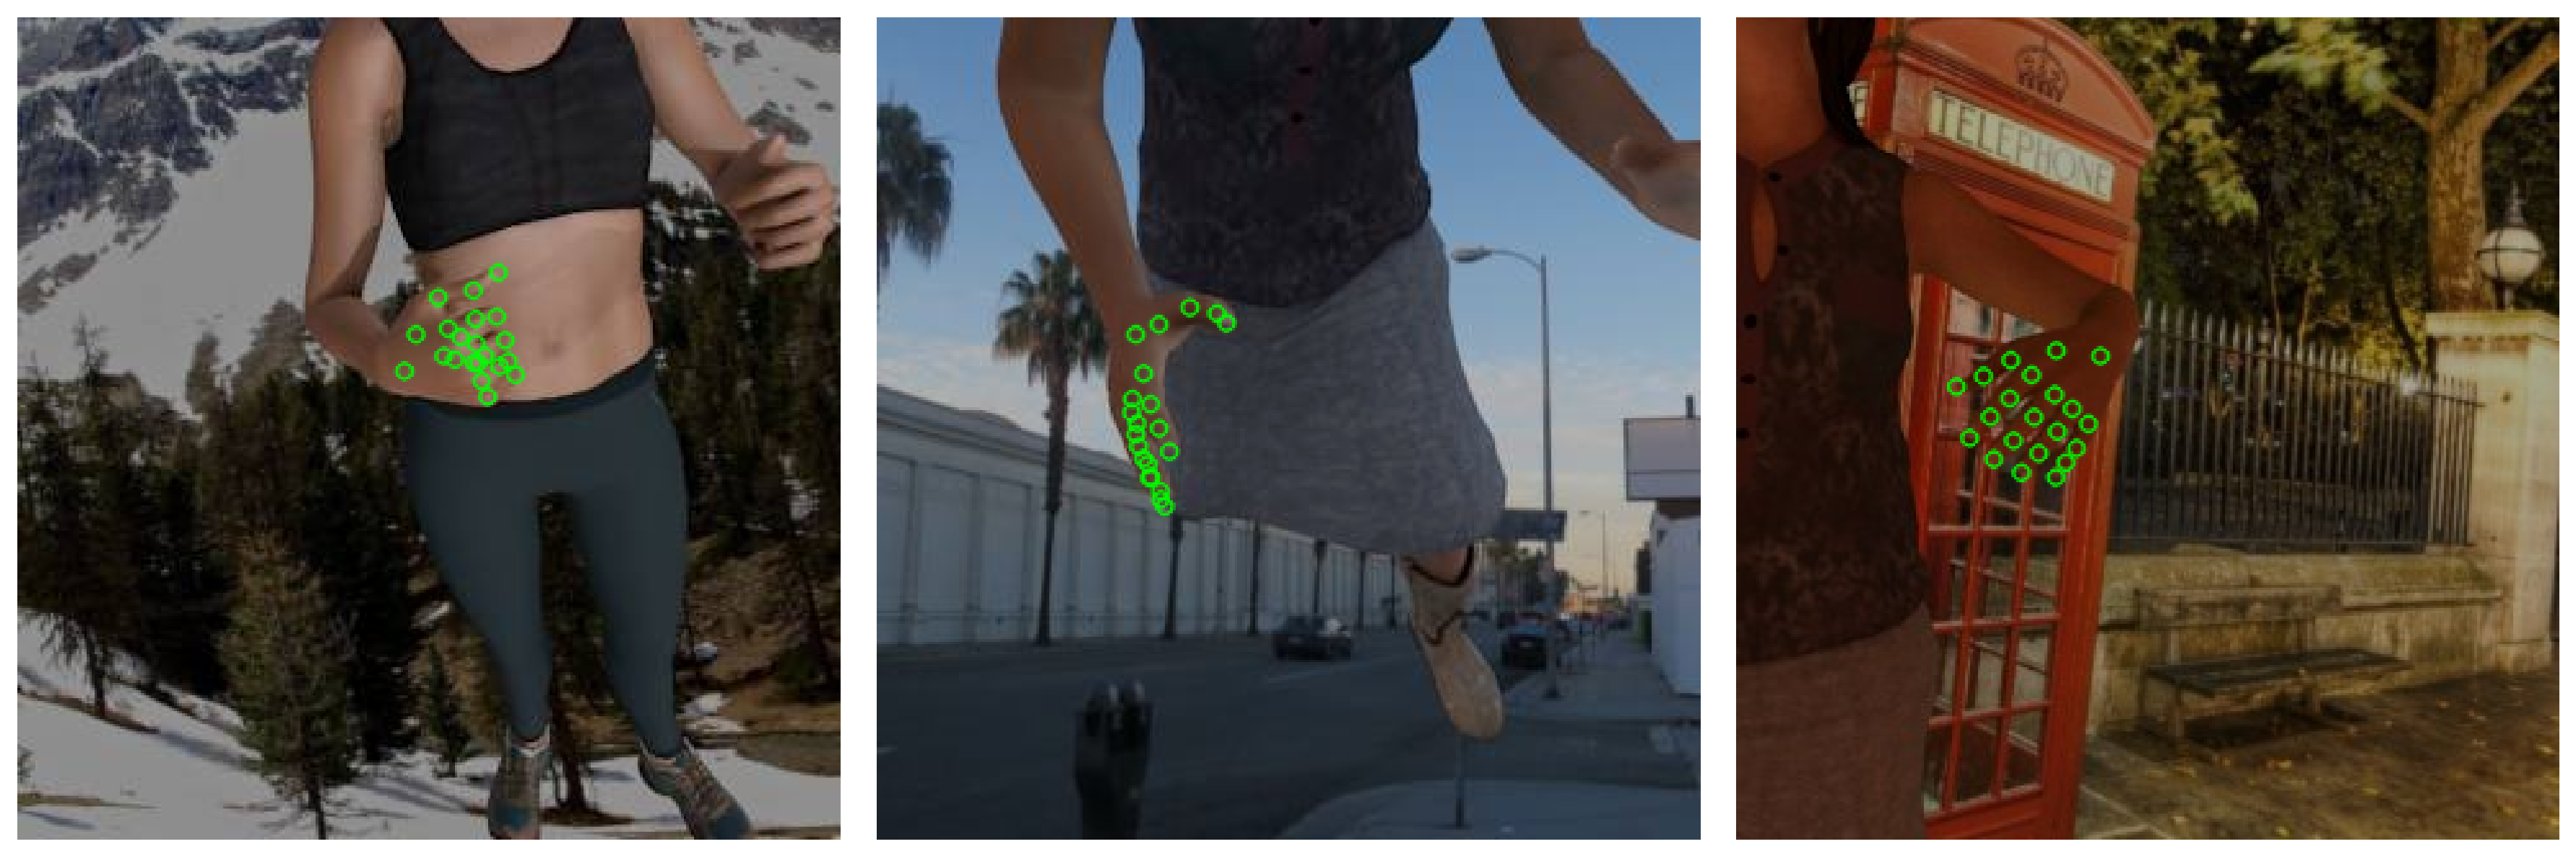

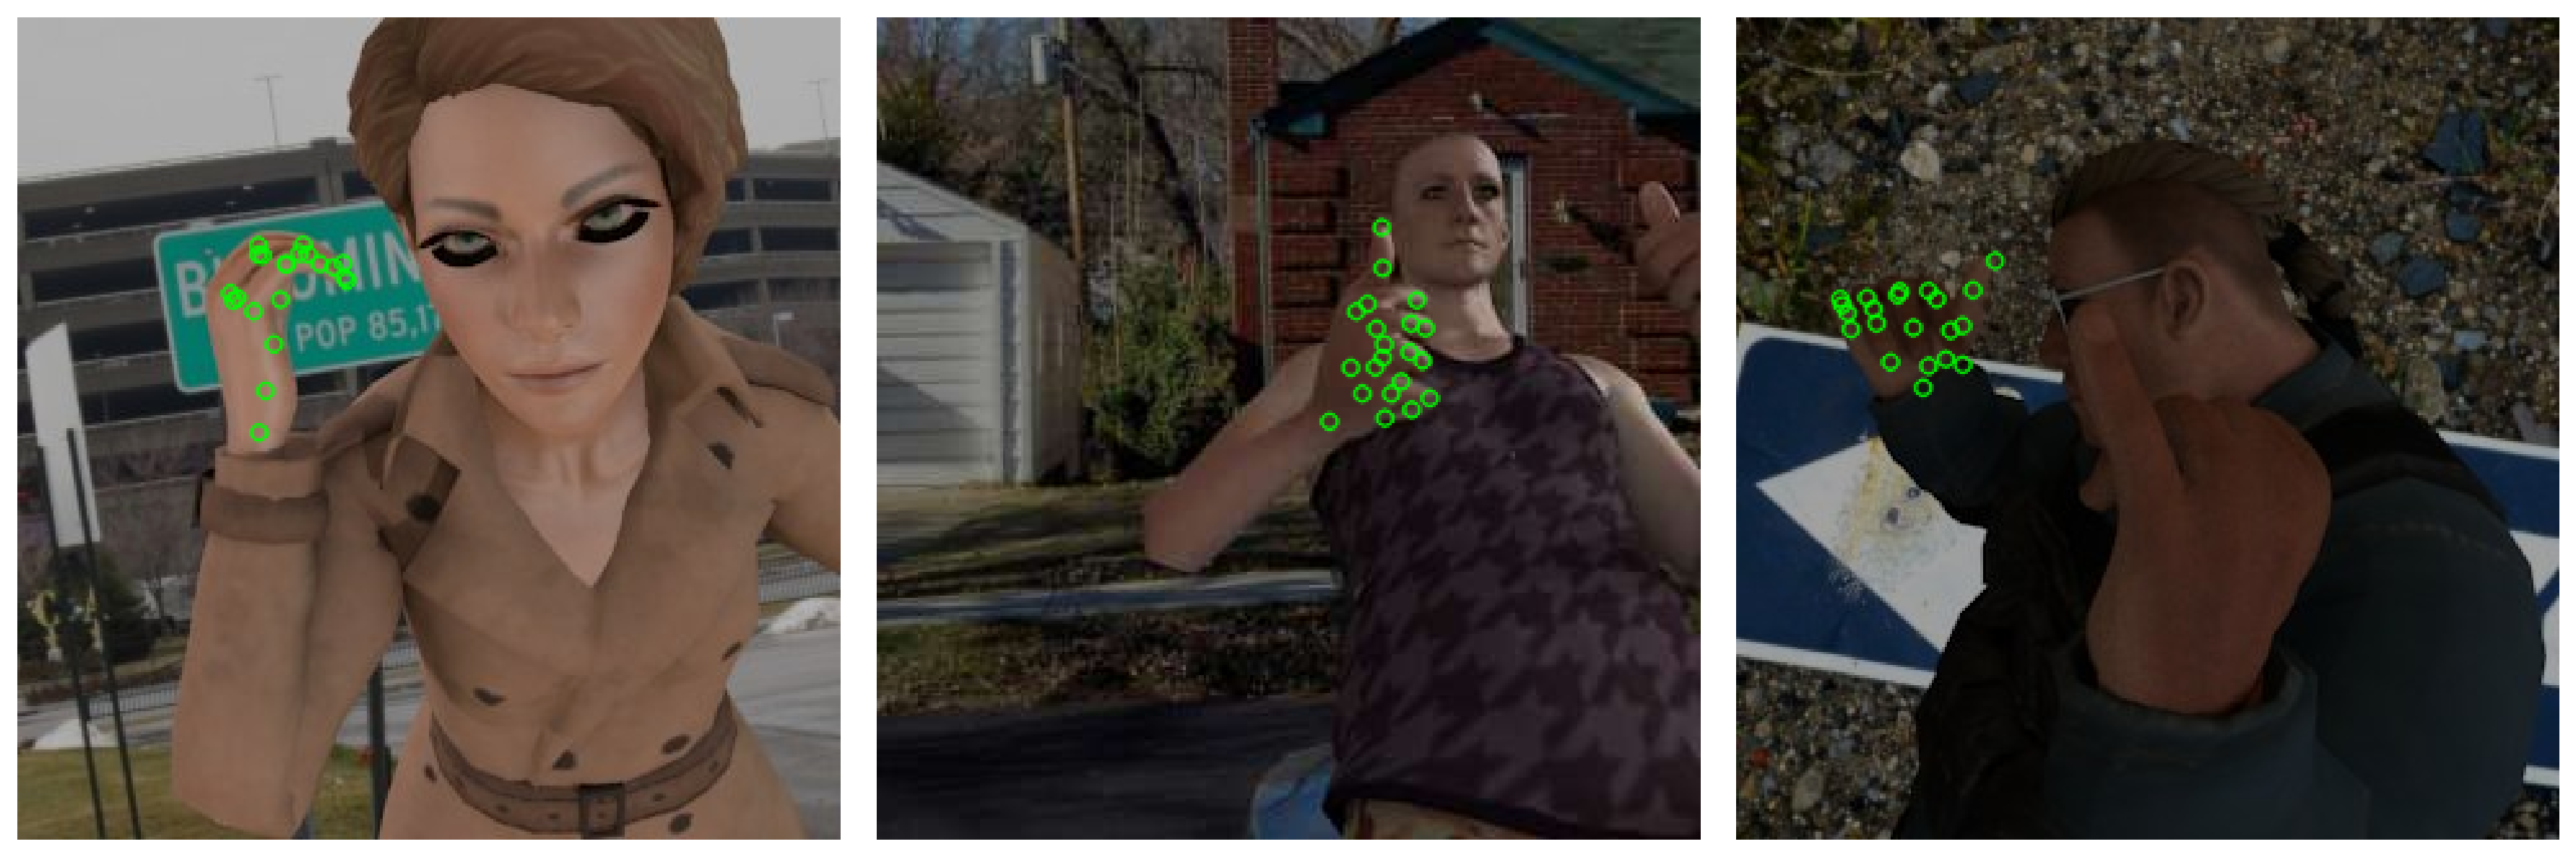

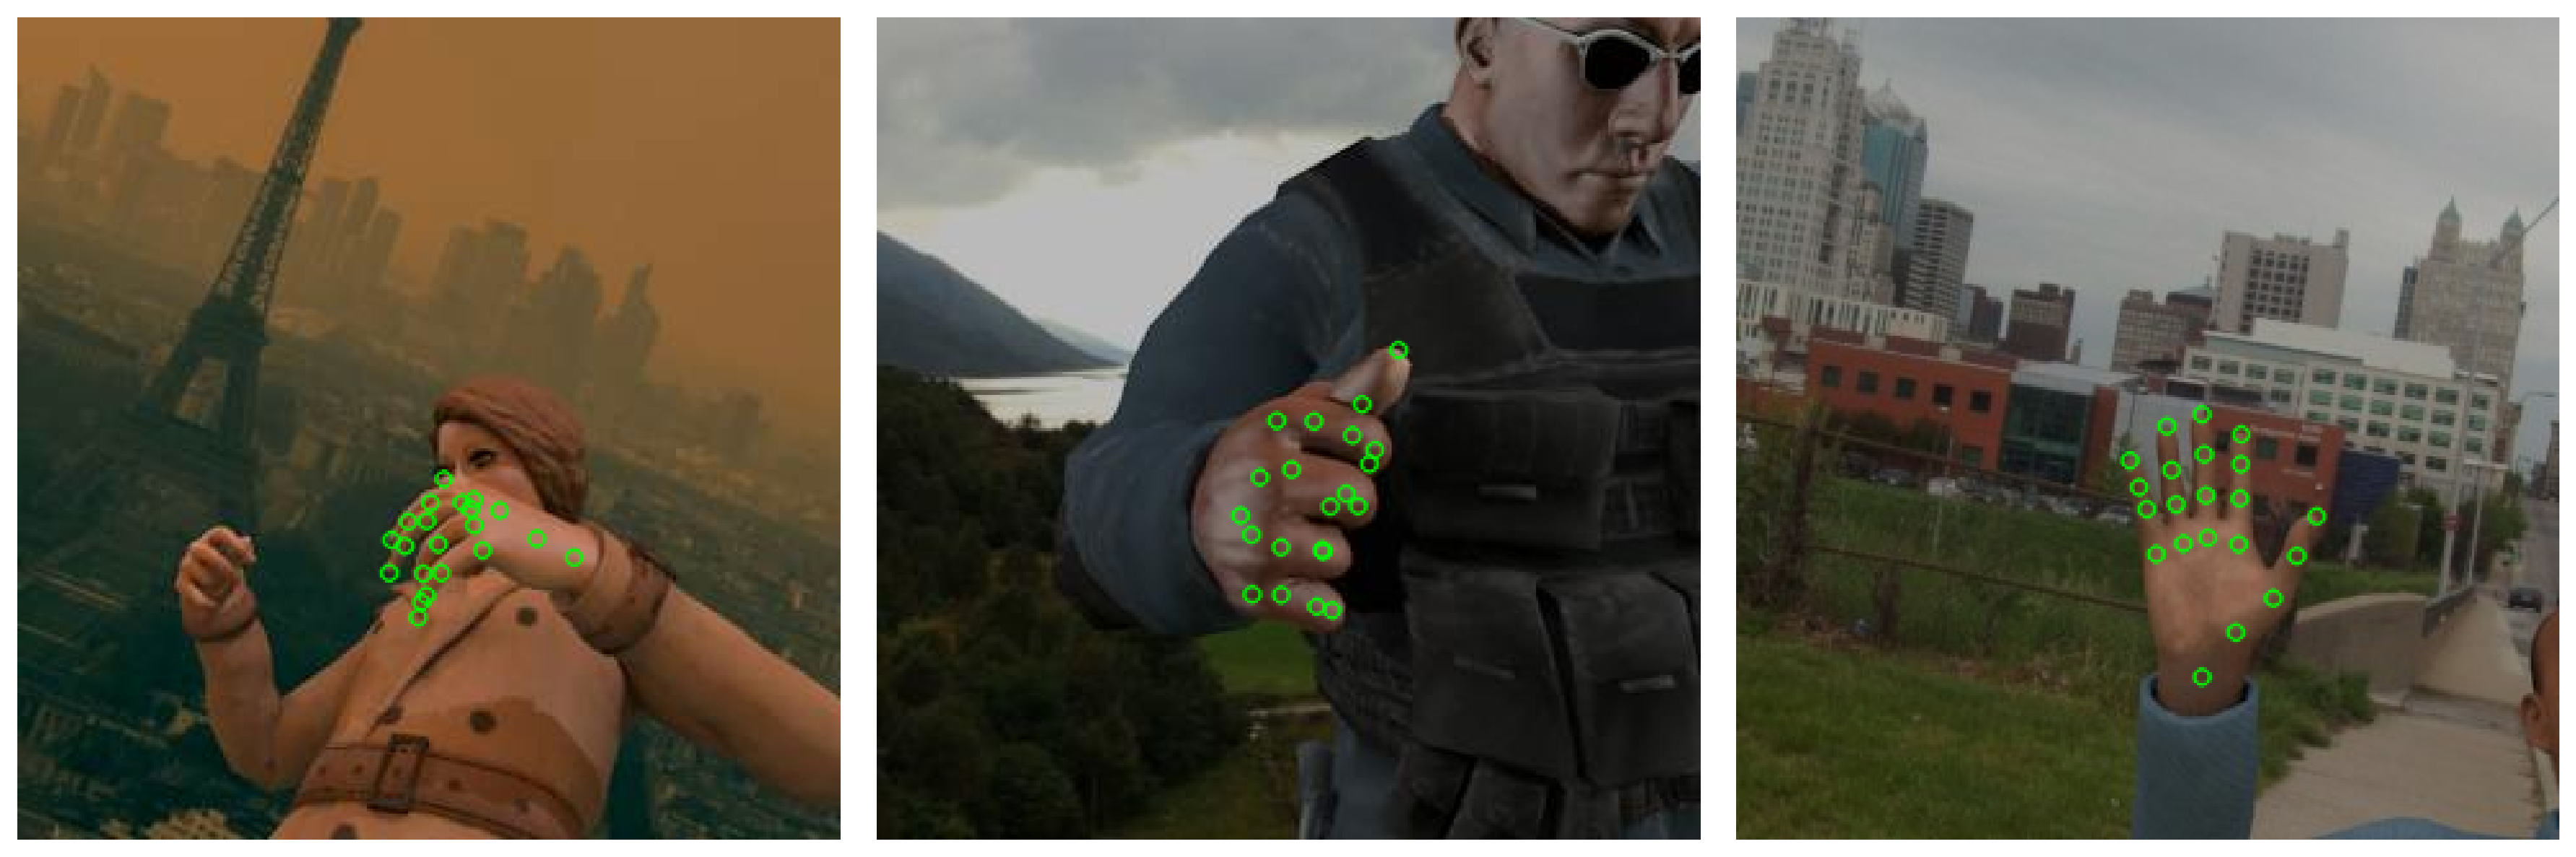

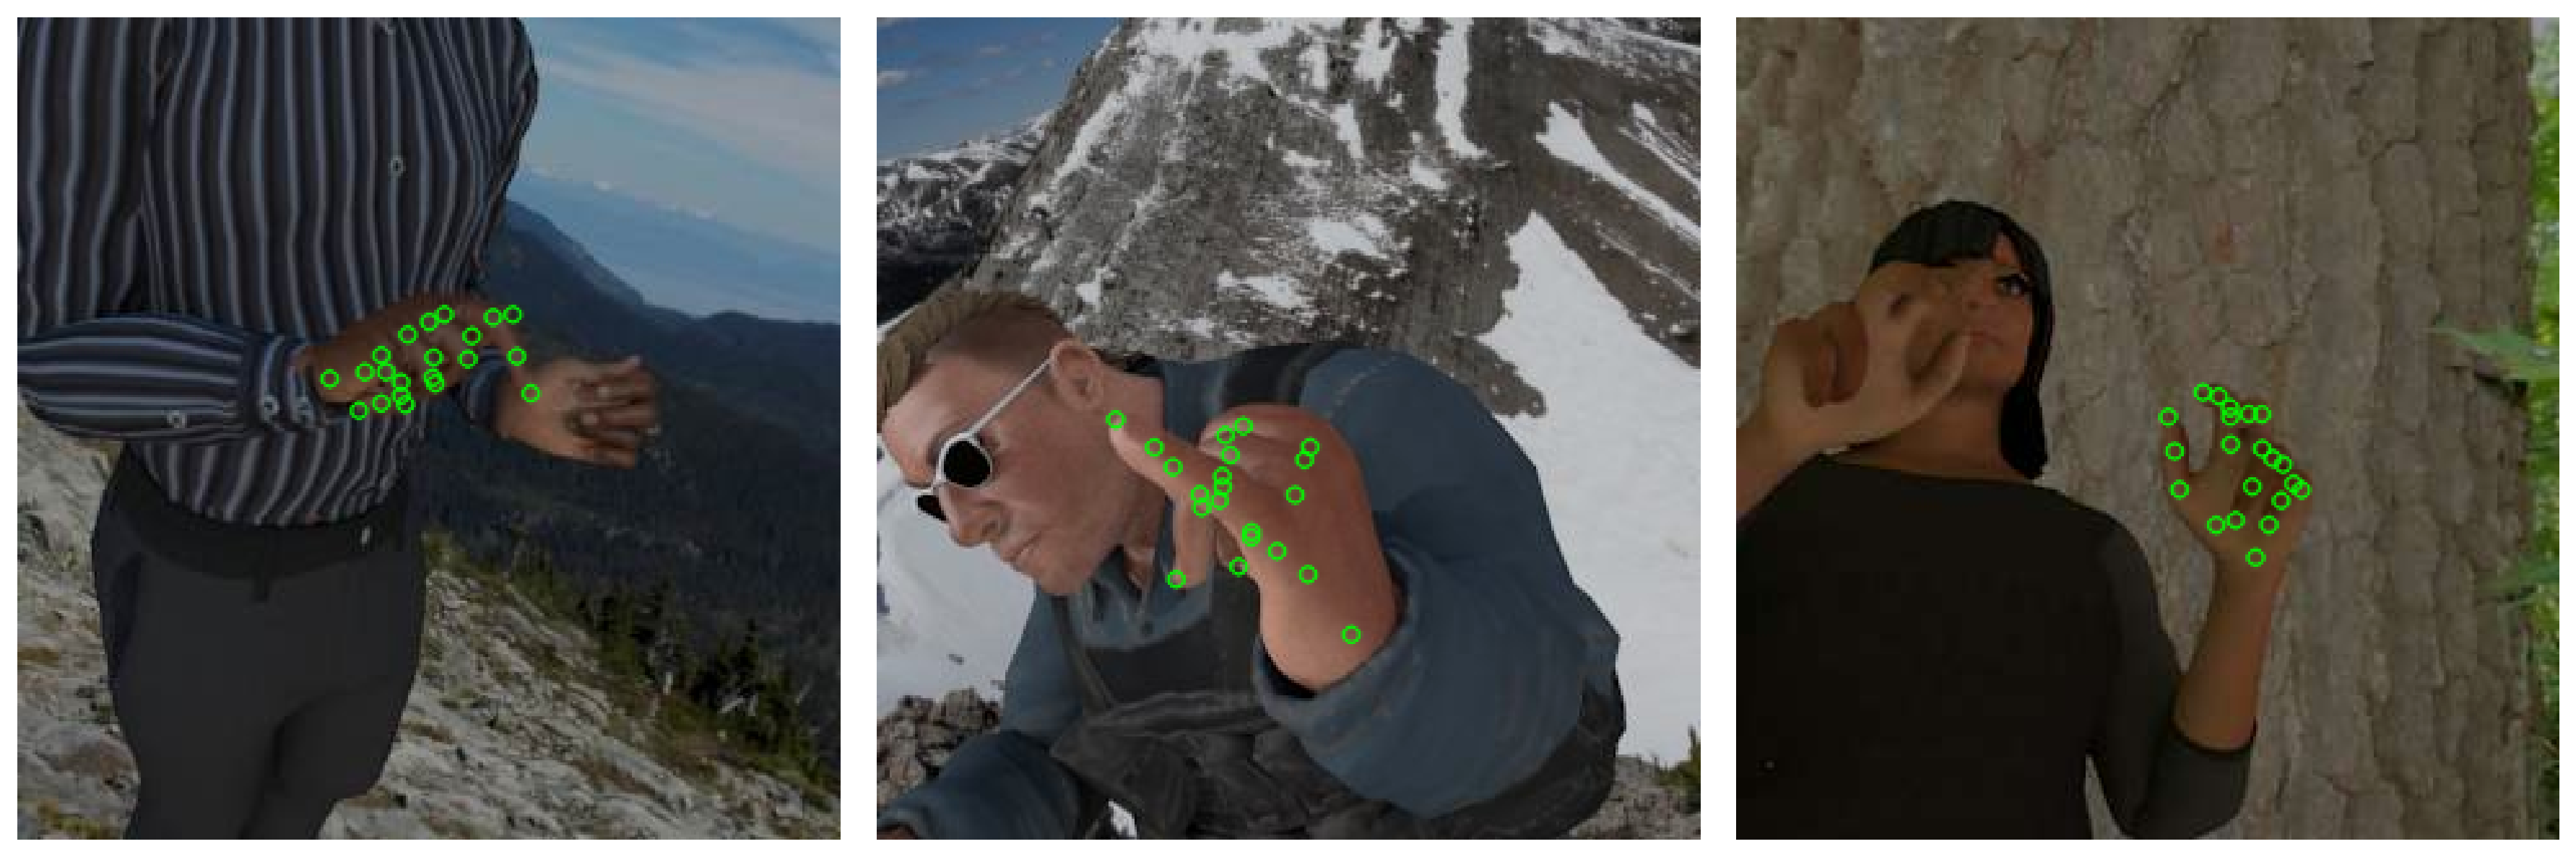

In [26]:
for i in range(5):
    plot_imgs([draw_keypoints(next(train_data))/255. for _ in range(3)], dpi=200)

# Test images

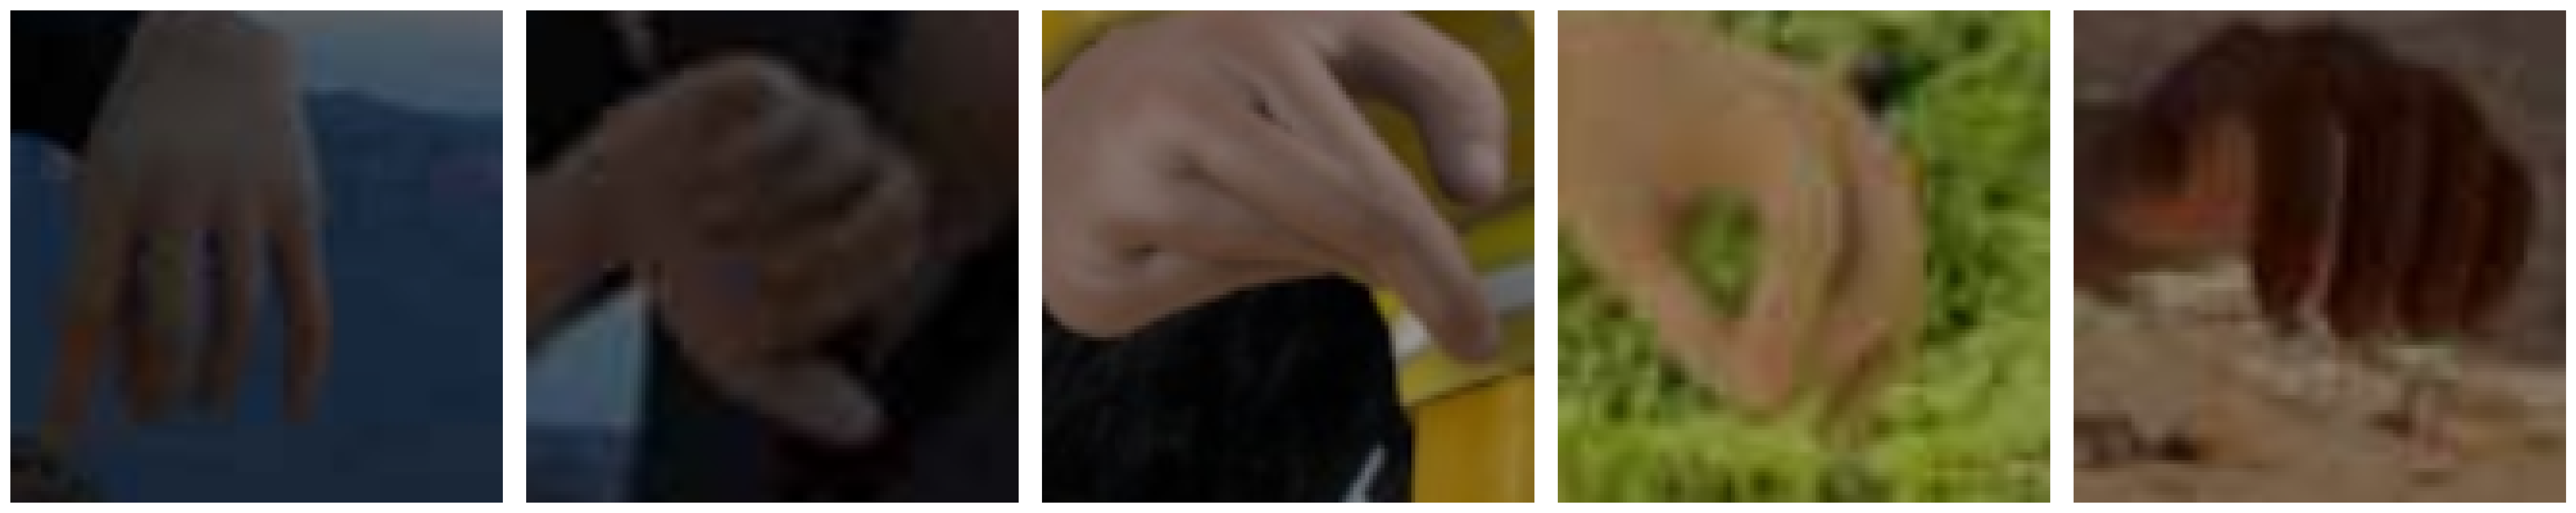

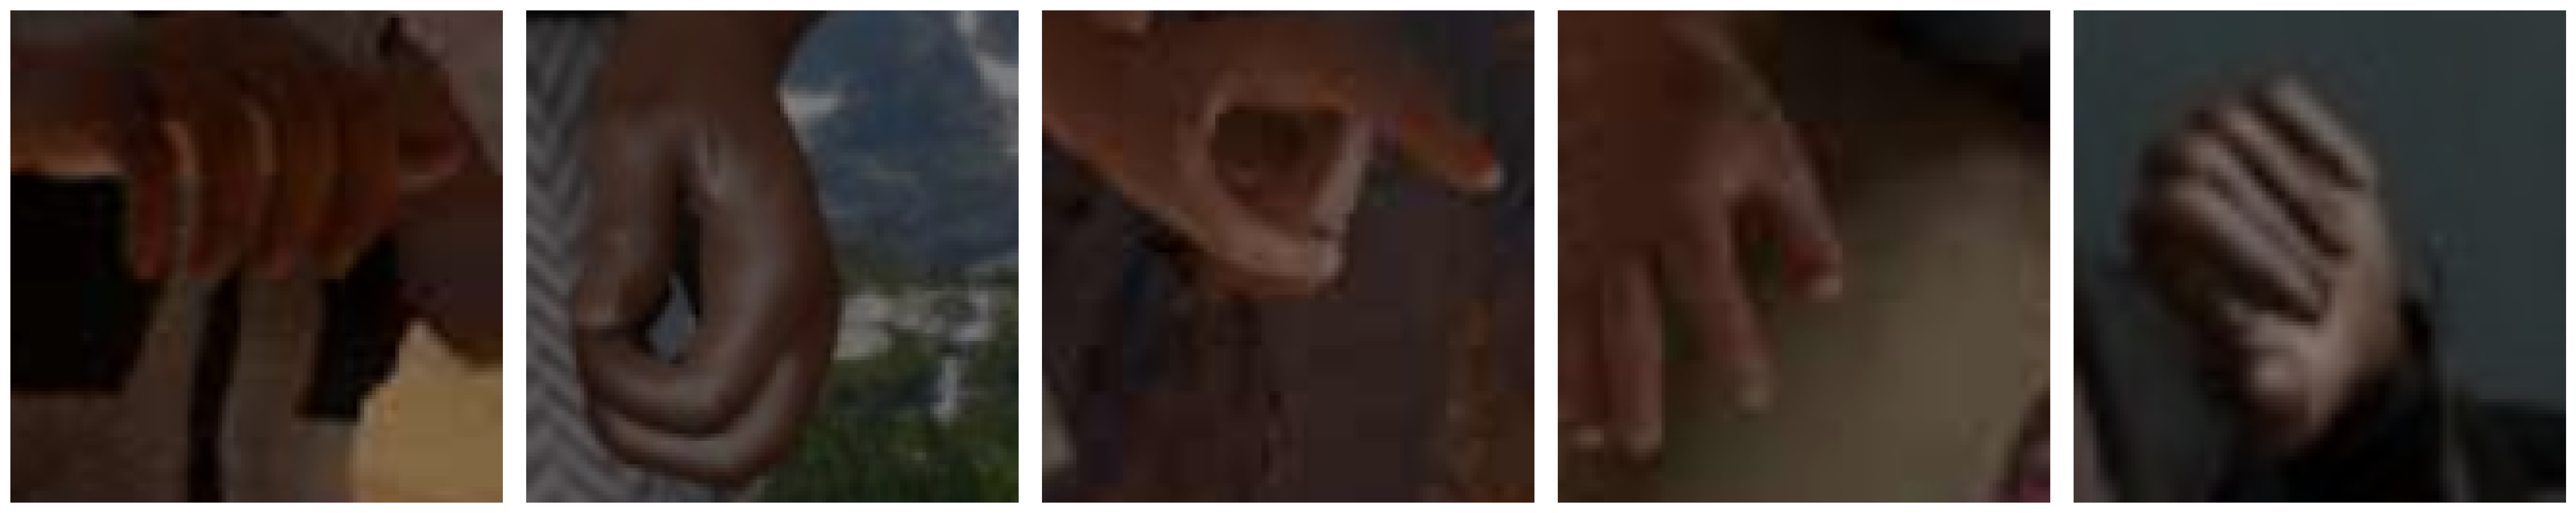

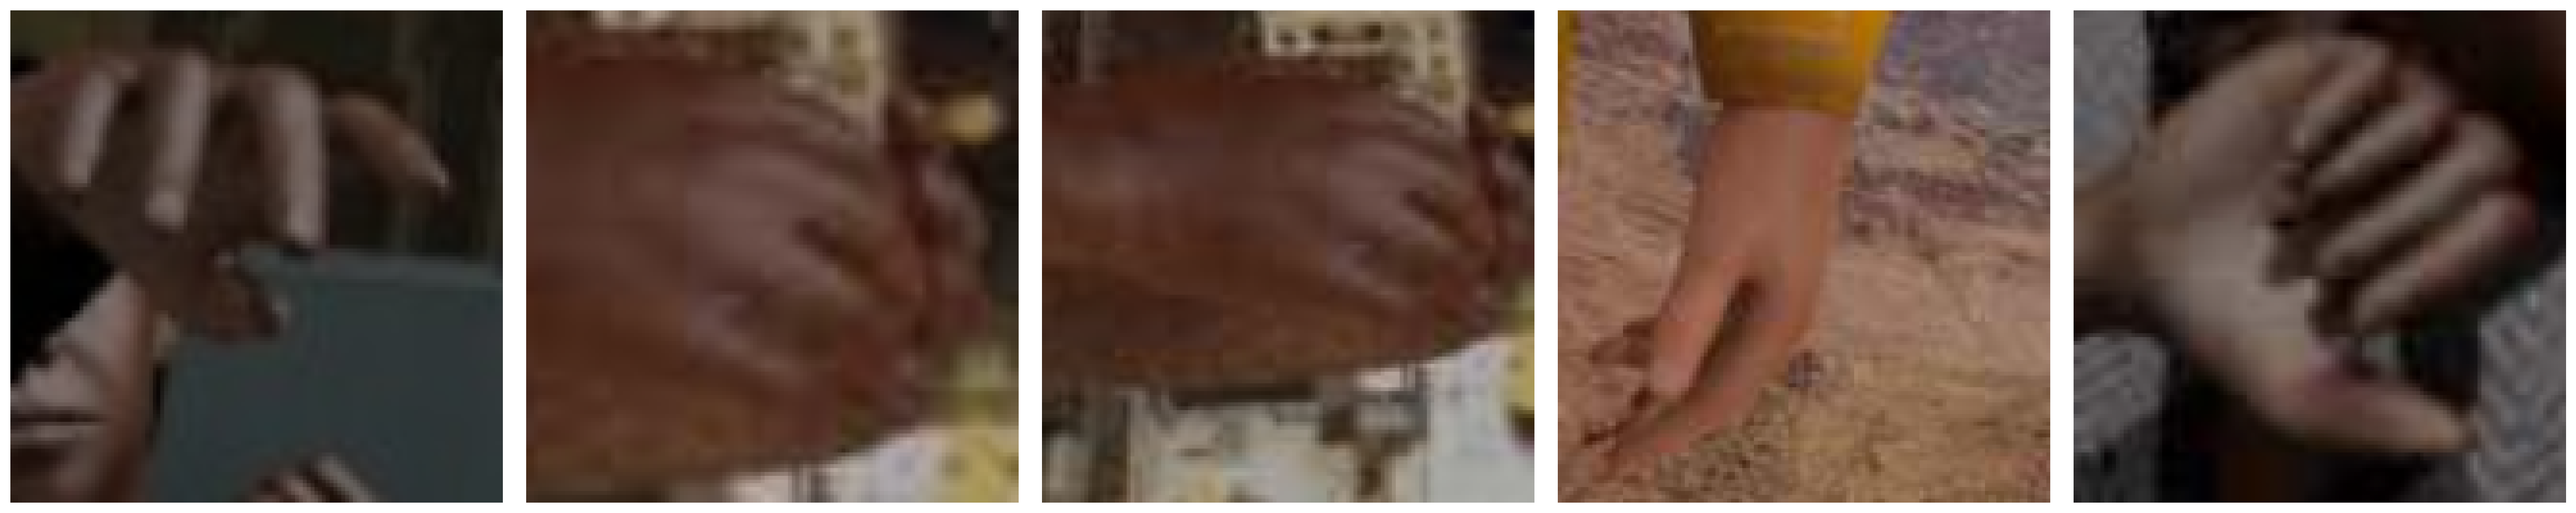

In [30]:
for i in range(3):
    plot_imgs([next(test_data)['image']/255. for _ in range(5)], dpi=200)